<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# hypothesis testing introduction

## 0. python imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_1samp

%matplotlib inline

## 1. data loading / generation

t student distribution:
* resilient to small samples
* available when standard deviation is unknown

### t-student distribution example

#### pdf

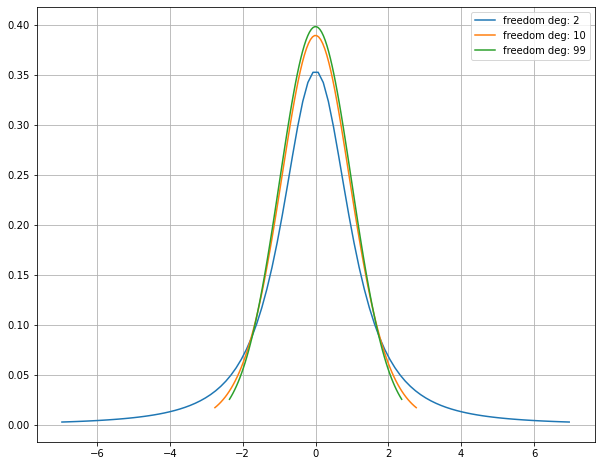

In [2]:
df = [2, 10, 99]
plt.figure(figsize=(10, 8))
for d in df:
    rv = t(df=d, loc=0, scale=1) # random variable
    x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
    y = rv.pdf(x)
    plt.plot(x, y, label=f'freedom deg: {d}')
plt.legend()
plt.grid()
plt.show()

#### cdf

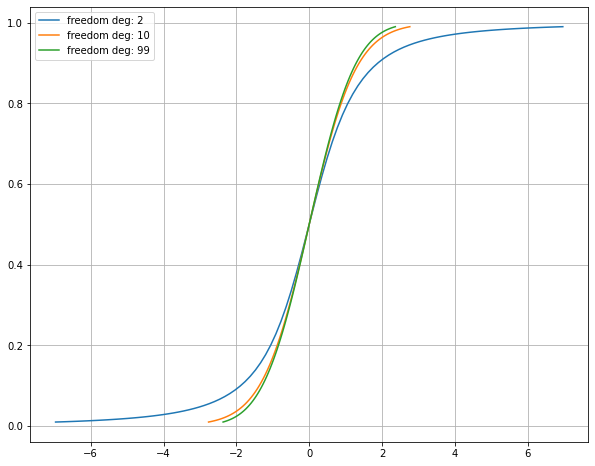

In [3]:
df = [2, 10, 99]
plt.figure(figsize=(10, 8))
for d in df:
    rv = t(df=d, loc=0, scale=1) # random variable
    x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
    y = rv.cdf(x)
    plt.plot(x, y, label=f'freedom deg: {d}')
plt.legend()
plt.grid()
plt.show()

### normal distribution example

#### pdf

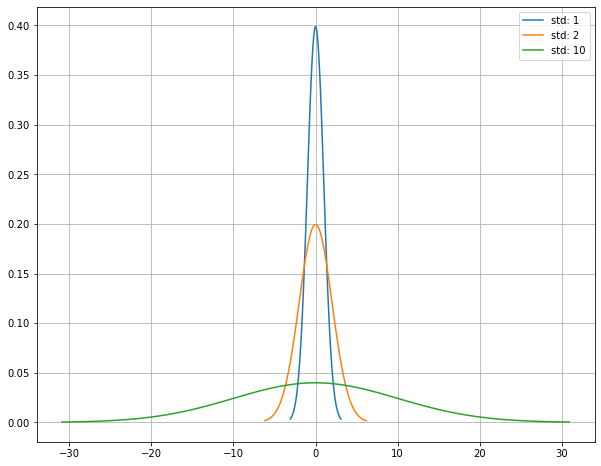

In [4]:
sc = [1, 2, 10]
plt.figure(figsize=(10, 8))
for s in sc:
    rv = norm(scale=s, loc=0) # random variable
    x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)
    y = rv.pdf(x)
    plt.plot(x, y, label=f'std: {s}')
plt.legend()
plt.grid()
plt.show()

#### cdf

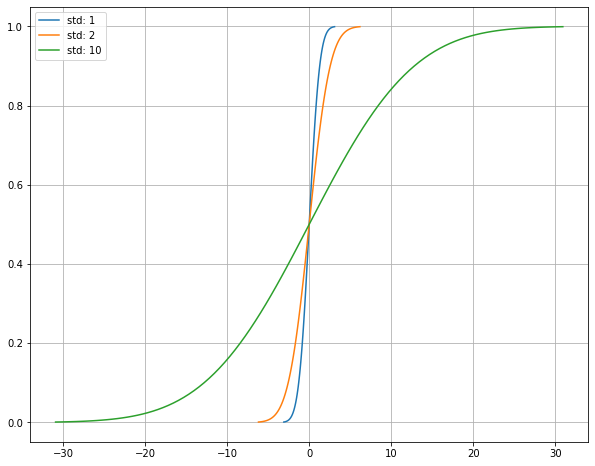

In [5]:
sc = [1, 2, 10]
plt.figure(figsize=(10, 8))
for s in sc:
    rv = norm(scale=s, loc=0) # random variable
    x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)
    y = rv.cdf(x)
    plt.plot(x, y, label=f'std: {s}')
plt.legend()
plt.grid()
plt.show()

### 2. hypothesis test example (handmade)

* explain concept of degrees of freedom in statistics
* hat example
* mean example

hand-made **example 1**, hemoglobin after treatment is less than 5.7, one-sided test, less than:

* 100 subjects
* average is known, 99 degrees of freedom
* t student

In [6]:
mu = 5.7
mu_hat = 5.1
std_hat = 1.6
n = 100

In [7]:
t_test = (mu_hat - mu) / (std_hat / np.sqrt(n))
t_test

-3.750000000000003

In [8]:
rv = t(df=n-1)
p_value = rv.cdf(t_test)

In [9]:
p_value

0.0001489332089038242

probability of `mu_hat` being less than 5.7 by chance is 0.0005, much less than 0.05, so null hypothesis is rejected.

hand-made **example 2**: spaniards are taller than 1.70, one-sided test, greater than:

* 100 subjects (99 df)
* sample mean is 1.72
* sample std is 0.2

In [10]:
mu = 1.80
mu_hat = 1.789
std_hat = 0.15
n = 500

In [11]:
t_test = (mu_hat - mu) / (std_hat / np.sqrt(n))
t_test

-1.639783183499864

In [12]:
rv = t(df=n-1)
p_value = rv.cdf(t_test)
p_value

0.05084023650685924

## 3. hypothesis test example (using scipy)

1. hemoglobin after treatment is less than 5.7:

In [14]:
patients = np.random.normal(5.1, 1.6, 100)
test_results = ttest_1samp(patients, 5.7)
display(test_results.statistic)
display(test_results.pvalue / 2)

-4.239432132919577

2.519629640884505e-05

2. spaniards are taller than 1.7:

In [15]:
spaniards = np.random.normal(1.72, 0.1, 100)
test_results = ttest_1samp(spaniards, 1.70)
display(test_results.statistic)
display(test_results.pvalue < 0.05)

1.6120375067028212

False

**if there is enough time, make Renfe test with price of Madrid - Sevilla tickets**

In [19]:
renfe = pd.read_csv('../../week_07/dataframe_calculations_and_big_data_tools/data/renfe_sample.csv')

In [20]:
filter_origin = renfe['origin'] == 'MADRID'
filter_destination = renfe['destination'] == 'SEVILLA'

In [21]:
renfe[filter_origin & filter_destination].price.mean()

59.39847191367819

In [22]:
result = ttest_1samp(renfe[filter_origin & filter_destination].price.dropna(), 60)

In [23]:
result.pvalue / 2 < 0.05

True

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>